# Tarea: Para el conjunto de datos Zahn (Z), encontrar:

### 1. Distancia esperada de cada vector al resto de los vectores. E(v) es la distancia esperada del vector v al resto.


In [83]:
from scipy import spatial
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

In [84]:
data = pd.read_csv("https://raw.githubusercontent.com/arturoTellez/Deteccion_anomalias_homework/master/conjunto_datos_zahn/zahn.dat", header = None, sep = "\t")
display(data.sample(10))
data.info()

,0,1
376,19.60,6.25
120,34.35,14.20
371,19.05,7.45
372,18.35,7.60
52,32.40,19.15
53,32.45,18.70
167,10.30,19.15
285,12.10,7.60
193,15.75,18.25
219,21.45,19.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       399 non-null    float64
 1   1       399 non-null    float64
dtypes: float64(2)
memory usage: 6.4 KB


Text(0, 0.5, 'X2')

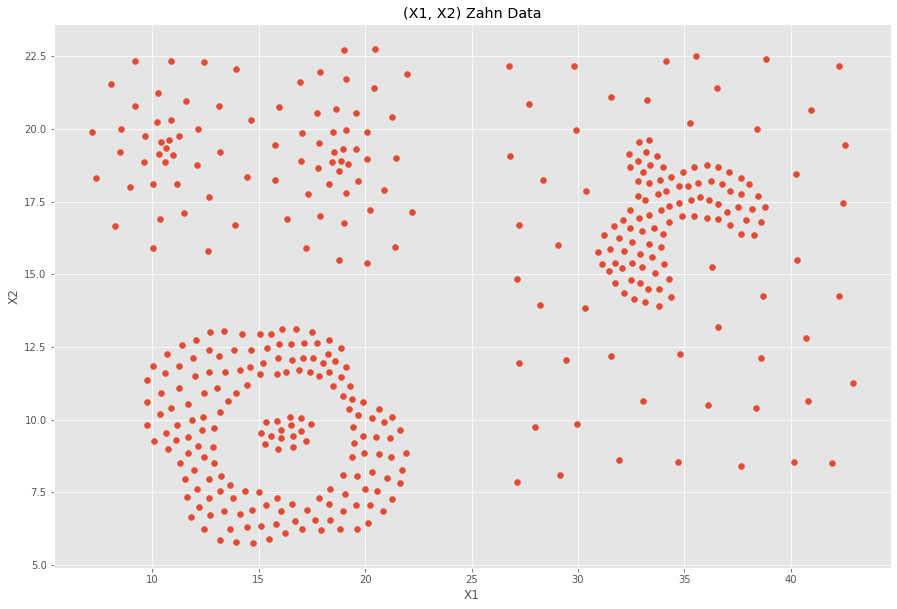

In [85]:
plt.figure(figsize=(15, 10))
plt.scatter(data.iloc[:,0], data.iloc[:,1])
plt.title("(X1, X2) Zahn Data")
plt.xlabel("X1")
plt.ylabel("X2")

In [86]:
distances = spatial.distance_matrix(data.values, data.values)

In [87]:
mean_distances = np.mean(distances, axis=1)

### 2. Densidad de cada vector: Número de vecinos en una Hiperesfera de radio r = (Diam(Z)/2, Diam(Z)/3, Diam(Z)/5),
Diam(Z)/10)). D(v,r) es la densidad del vector v para una hiperesfera de radio r.


In [88]:
D_2 = np.sum(distances < 2, axis = 1)
D_3 = np.sum(distances < 3, axis = 1)
D_5 = np.sum(distances < 5, axis = 1)


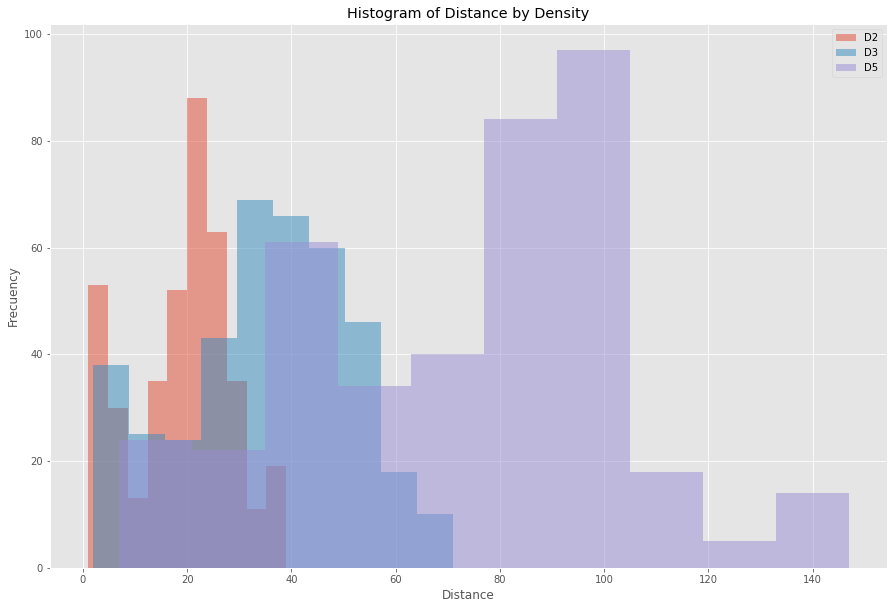

In [89]:
plt.figure(figsize = (15, 10))
plt.hist(D_2, alpha = 0.5, label = "D2")
plt.hist(D_3, alpha = 0.5, label = "D3")
plt.hist(D_5, alpha = 0.5, label = "D5")
plt.xlabel("Distance")
plt.ylabel("Frecuency")
plt.title("Histogram of Distance by Density")
plt.legend()


### 3. Graficar Zahn, codificando E(v) y D(v) en color o forma del punto.


Text(0.5, 1.0, 'Data Zahn with mean distances for each point')

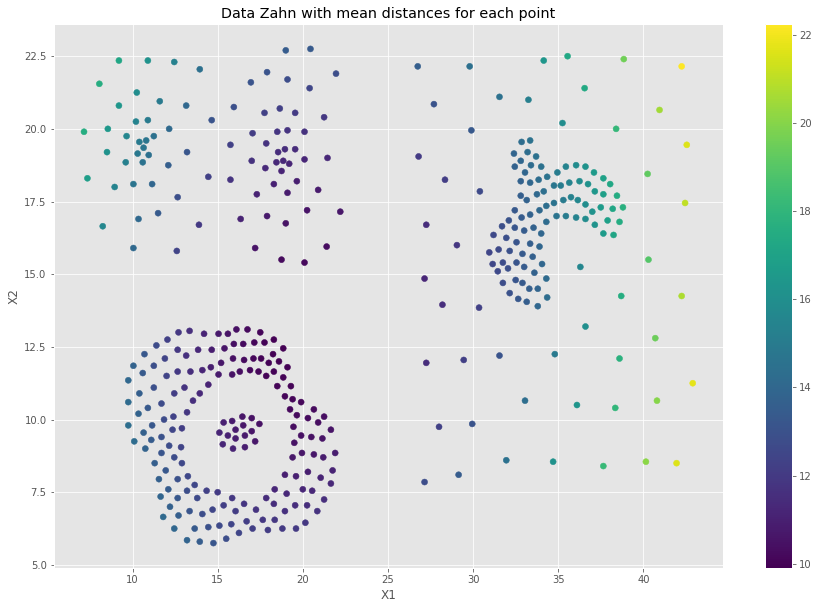

In [90]:
plt.figure(figsize=(15, 10))
plt.scatter(data.iloc[:, 0],data.iloc[:, 1,], c = mean_distances, label = "D(2)")
plt.colorbar()
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Data Zahn with mean distances for each point")

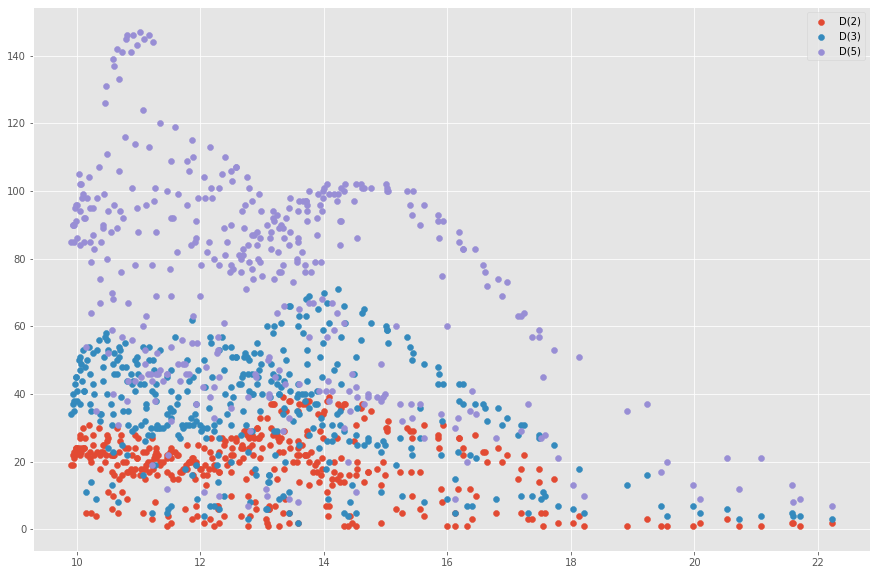

In [91]:
plt.figure(figsize=(15, 10))
plt.scatter(mean_distances, D_2, label = "D(2)")
plt.scatter(mean_distances, D_3, label = "D(3)")
plt.scatter(mean_distances, D_5, label = "D(5)")
plt.legend()


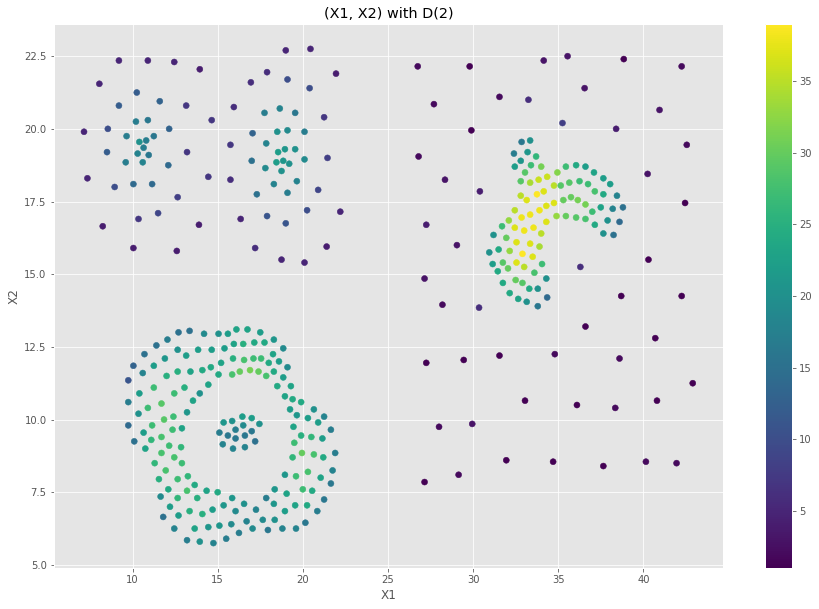

In [92]:
plt.figure(figsize=(15, 10))
plt.scatter(data.iloc[:, 0],data.iloc[:, 1,], c = D_2, label = "D(2)")
plt.colorbar()
plt.title("(X1, X2) with D(2)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

### 4. Graficar Zahn, codificando S = E(v)/D(v,r), para los Rs indicados.

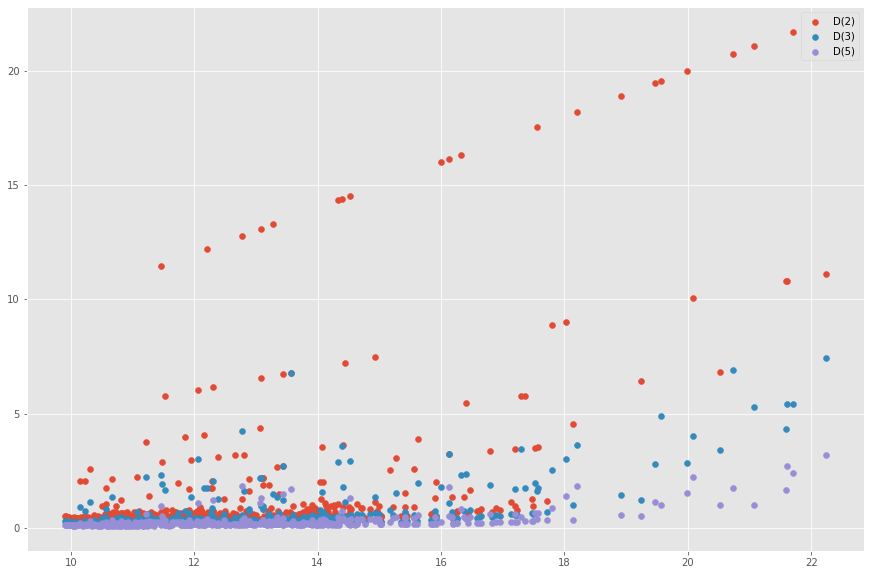

In [93]:
plt.figure(figsize=(15, 10))
plt.scatter(mean_distances, mean_distances/D_2, label = "D(2)")
plt.scatter(mean_distances, mean_distances/D_3, label = "D(3)")
plt.scatter(mean_distances, mean_distances/D_5, label = "D(5)")
plt.legend()


(array([344.,  29.,   7.,   5.,   4.,   6.,   1.,   1.,   1.,   1.]),
 array([0.07409738, 0.38433994, 0.69458249, 1.00482505, 1.31506761,
        1.62531016, 1.93555272, 2.24579528, 2.55603783, 2.86628039,
        3.17652295]),
 <BarContainer object of 10 artists>)

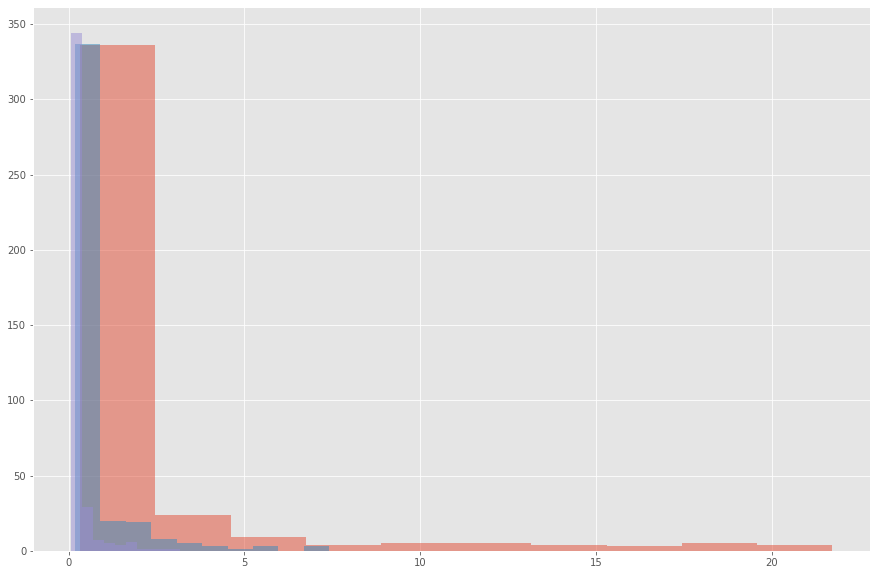

In [94]:
plt.figure(figsize = (15, 10))
plt.hist(mean_distances/D_2, alpha = 0.5)
plt.hist(mean_distances/D_3, alpha = 0.5)
plt.hist(mean_distances/D_5, alpha = 0.5)



Text(0.5, 1.0, 'Data Zahn with mean distances for each point')

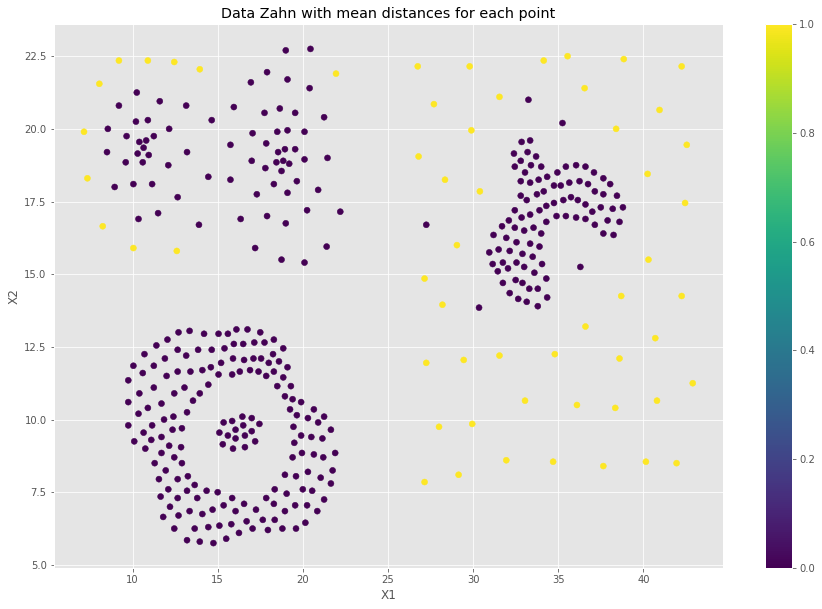

In [95]:
plt.figure(figsize=(15, 10))
plt.scatter(data.iloc[:, 0],data.iloc[:, 1,], c = mean_distances/D_2 > 3, label = "D(2)")
plt.colorbar()
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Data Zahn with mean distances for each point")

Text(0.5, 1.0, 'Data Zahn with mean distances for each point')

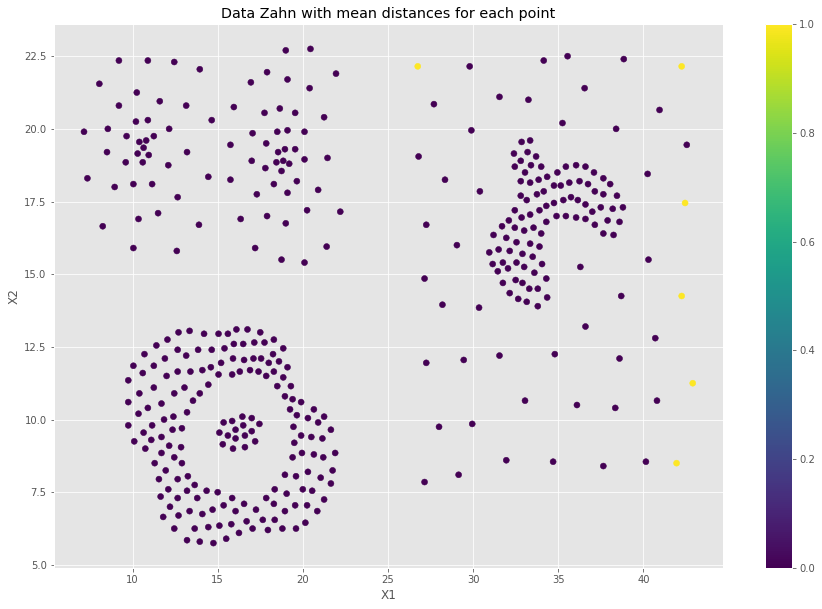

In [96]:
plt.figure(figsize=(15, 10))
plt.scatter(data.iloc[:, 0],data.iloc[:, 1,], c = mean_distances/D_3 > 5, label = "D(2)")
plt.colorbar()
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Data Zahn with mean distances for each point")

Text(0.5, 1.0, 'Data Zahn with mean distances for each point')

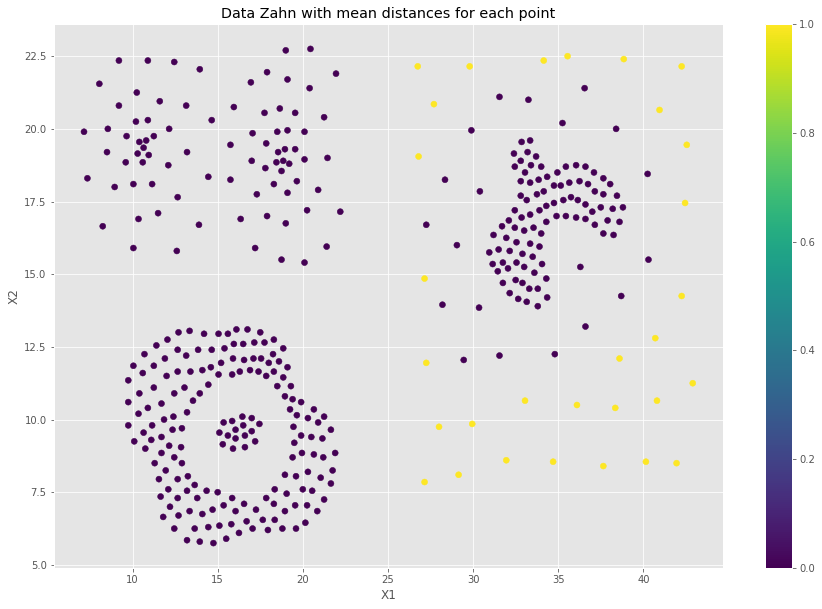

In [97]:
plt.figure(figsize=(15, 10))
plt.scatter(data.iloc[:, 0],data.iloc[:, 1,], c = mean_distances/D_3 > 2, label = "D(2)")
plt.colorbar()
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Data Zahn with mean distances for each point")